In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_data(csv):
    df = pd.read_csv(csv, index_col=0, encoding='ISO-8859-1')
    return df

csv = "red_wine4_30.csv"
wine_df = get_data(csv)
wine_df

,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
1,Merlot,2019,United States,California,Crane Lake,3.6,30,4.99
2,Cabernet Sauvignon,2011,United States,Columbia Valley,Hogue,3.3,76,4.95
3,Hot To Trot Smooth Red Blend,2013,United States,Columbia Valley,14 Hands,3.7,3917,4.99
4,Cabernet Sauvignon,2010,Chile,Maule Valley,Aromo,3.0,189,4.99
5,Loggia del Conte Chianti,2016,Italy,Chianti,Le Chiantigiane,3.3,149,4.99
...,...,...,...,...,...,...,...,...
13378,Borro del Diavolo Riserva Chianti Classico,2017,Italy,Chianti Classico,Ormanni,3.9,94,29.75
13379,Alsace Rouge,2019,France,Alsace,Marcel Deiss,3.8,41,29.99
13380,Malbec,2016,Argentina,Mendoza,Mariflor,4.1,914,30.00
13381,Grand Mère Pinot Noir,2018,Argentina,Uco Valley,Domaine Nico,4.3,215,29.56


In [6]:
def print_summarize_dataset(dataset):
    """This function prints out the dimension, first 10 rows, and the statistical summary of the boston housing prices data"""
    
    # print the data dimension
    print("Dataset dimension:")
    print(dataset.shape)
    print()
   
    # print the first 10 rows
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print()

    # print the summary statistics
    print("Statistical summary:")
    print(dataset.describe())

# Assuming you have a dataset named 'dataset' containing the boston housing prices data
print_summarize_dataset(wine_df)


Dataset dimension:
(10383, 8)

First 10 rows of dataset:
                       wine_name  wine_year   wine_country      wine_region  \
1                         Merlot       2019  United States       California   
2             Cabernet Sauvignon       2011  United States  Columbia Valley   
3   Hot To Trot Smooth Red Blend       2013  United States  Columbia Valley   
4             Cabernet Sauvignon       2010          Chile     Maule Valley   
5       Loggia del Conte Chianti       2016          Italy          Chianti   
6           California Zinfandel       2009  United States       California   
7                          Tinto       2017       Portugal             Tejo   
8                         Merlot       2015  United States       California   
9                     Pinot Noir       2016  United States       California   
10            Cabernet Sauvignon       2018          Chile   Central Valley   

                   winery  wine_rating  n_ratings  wine_price  
1        

In [4]:
def data_info(dataset):
    """this function prints the information on the data set"""
    
    # checking for  number of duplicates in the dataset
    print("Total number of duplicates found:")
    print(dataset.duplicated().sum())
    print()
    
    # printing the datas information (bull values & data types)
    print("Dataset information:")
    dataset.info()
data_info(wine_df)

Total number of duplicates found:
0

Dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10383 entries, 1 to 13382
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wine_name     10383 non-null  object 
 1   wine_year     10383 non-null  int64  
 2   wine_country  10370 non-null  object 
 3   wine_region   10370 non-null  object 
 4   winery        10382 non-null  object 
 5   wine_rating   10383 non-null  float64
 6   n_ratings     10383 non-null  int64  
 7   wine_price    10383 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 730.1+ KB


In [5]:
#check rows with null values
wine_df.isna().sum()

wine_name        0
wine_year        0
wine_country    13
wine_region     13
winery           1
wine_rating      0
n_ratings        0
wine_price       0
dtype: int64

In [6]:
# drop the null values
wine_df.dropna(inplace = True)
wine_df.isna().sum()

wine_name       0
wine_year       0
wine_country    0
wine_region     0
winery          0
wine_rating     0
n_ratings       0
wine_price      0
dtype: int64

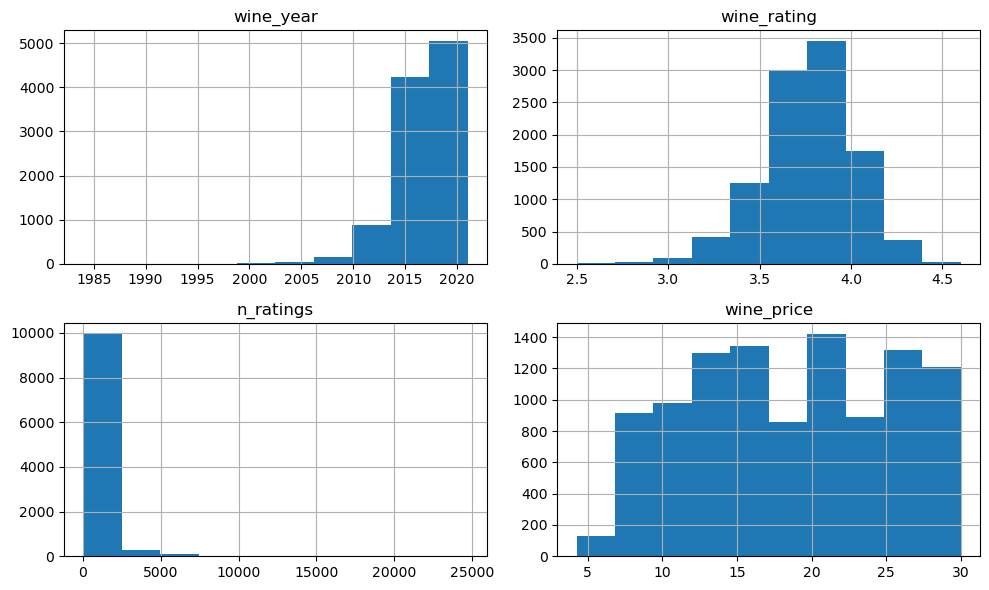

In [7]:
def print_histograms(dataset):
    """This function print the histogram distribution of each variable in the dataset"""
    dataset.hist(figsize=(10, 6))
    plt.tight_layout()
    
print_histograms(wine_df) 

In [8]:
def compute_correlations_matrix(data):
    corr = data.corr()
    return corr
compute_correlations_matrix(wine_df)

,wine_year,wine_rating,n_ratings,wine_price
wine_year,1.000000,0.095121,-0.028551,-0.042530
wine_rating,0.095121,1.000000,0.061597,0.514230
n_ratings,-0.028551,0.061597,1.000000,-0.104505
wine_price,-0.042530,0.514230,-0.104505,1.000000


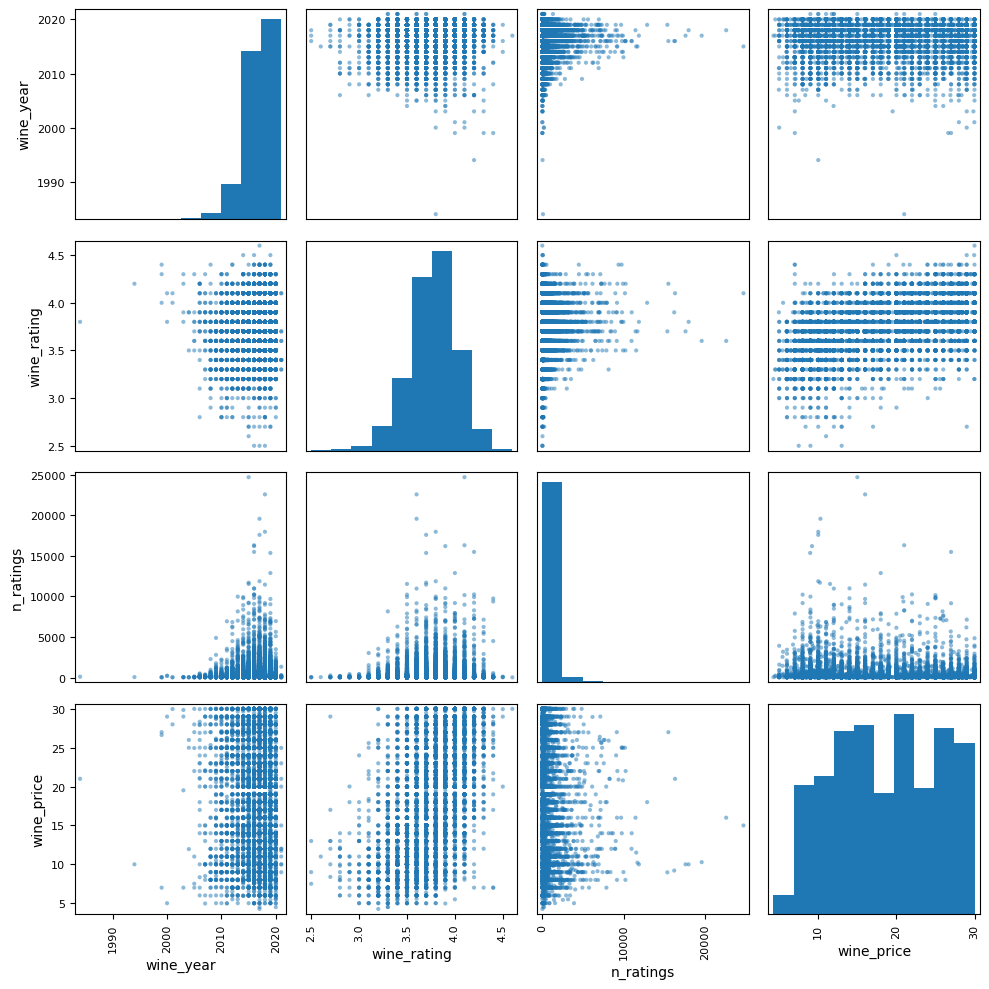

In [9]:
def print_scatter_matrix(data):
    """This function visualises the scatter matrix between the variables of the data set"""
    pd.plotting.scatter_matrix(data, figsize=(10, 10))
    plt.tight_layout()

print_scatter_matrix(wine_df)

In [55]:
wine_df['wine_name'].nunique()

4616

#### Average price of wine by country

In [13]:
average_price = wine_df['wine_price'].mean()
print("Overall Average Price of Wines: $", average_price)

# Calculate the average price by wine country
average_price_by_country =wine_df.groupby('wine_country')['wine_price'].mean().sort_values(ascending=False)
print("\nAverage Price of Wines by Country:")
print(average_price_by_country)

Overall Average Price of Wines: $ 18.591177548461538

Average Price of Wines by Country:
wine_country
Slovakia           29.000000
Czech Republic     28.990000
Moldova            26.990000
Mexico             23.791500
Germany            23.754348
North Macedonia    23.490000
Croatia            22.592000
Austria            22.372500
Bolivia            21.990000
Montenegro         21.990000
Lebanon            21.978750
Morocco            21.950000
New Zealand        21.495506
France             20.694264
Italy              19.970449
Greece             19.903421
Slovenia           19.795000
Uruguay            19.585909
Armenia            19.112000
Turkey             18.995714
Serbia             18.990000
Canada             18.884000
Hungary            18.741250
South Africa       18.685000
Bulgaria           18.662222
Israel             18.388333
United States      18.333578
Spain              17.407538
Georgia            17.318000
Australia          16.692282
Argentina          16.573215

#### Top 20 most Rated wine

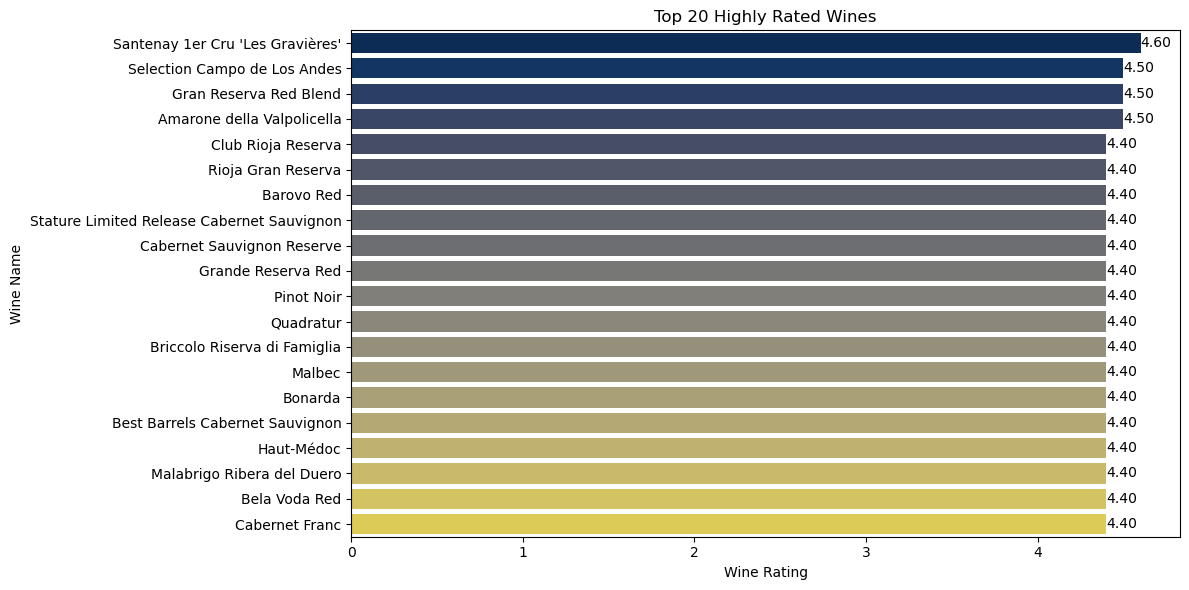

In [57]:
# Sort the wines based on the number of ratings in descending order
highly_rated_wines = wine_df.sort_values(by='wine_rating', ascending = False).reset_index().head(20)

plt.figure(figsize=(12, 6))
barplot = sb.barplot(x='wine_rating', y='wine_name', data=highly_rated_wines, palette='cividis')

# Display the ratings on the bars
for p in barplot.patches:
    barplot.annotate(f"{p.get_width():.2f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Wine Rating')
plt.ylabel('Wine Name')
plt.title('Top 20 Highly Rated Wines')
plt.tight_layout()
plt.show()

#### relationship between wine rating  and number of rating

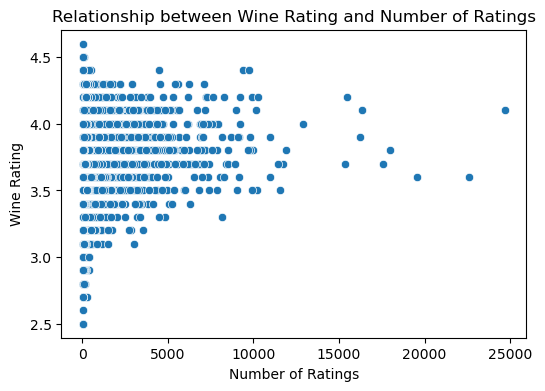

In [10]:
def plot_scatter(x, y, x_label, y_label, title):
    plt.figure(figsize=(6, 4))
    sb.scatterplot(data=wine_df, x=x, y=y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_scatter(x='n_ratings', y='wine_rating', x_label='Number of Ratings', y_label='Wine Rating', 
             title='Relationship between Wine Rating and Number of Ratings')


### Relationship between wine rating and wine_price

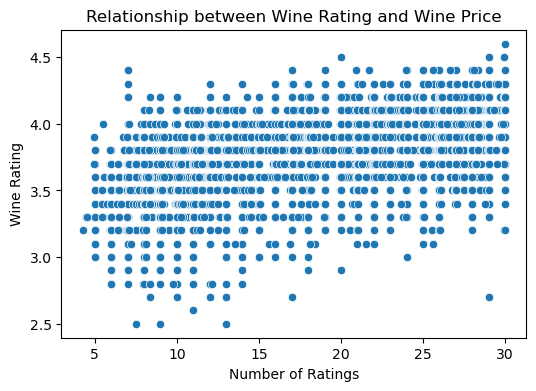

In [11]:
plot_scatter(x='wine_price', y='wine_rating', x_label='Number of Ratings', y_label='Wine Rating', 
             title='Relationship between Wine Rating and Wine Price')


#### Relationship between number of Rating  and wine_price

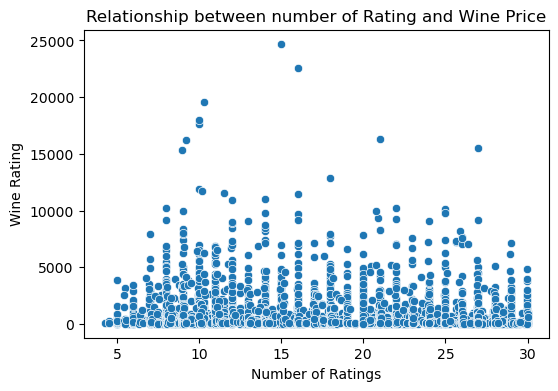

In [67]:
plot_scatter(x='wine_price', y='n_ratings', x_label='Number of Ratings', y_label='Wine Rating', 
             title='Relationship between number of Rating and Wine Price')

#### Wine price over time

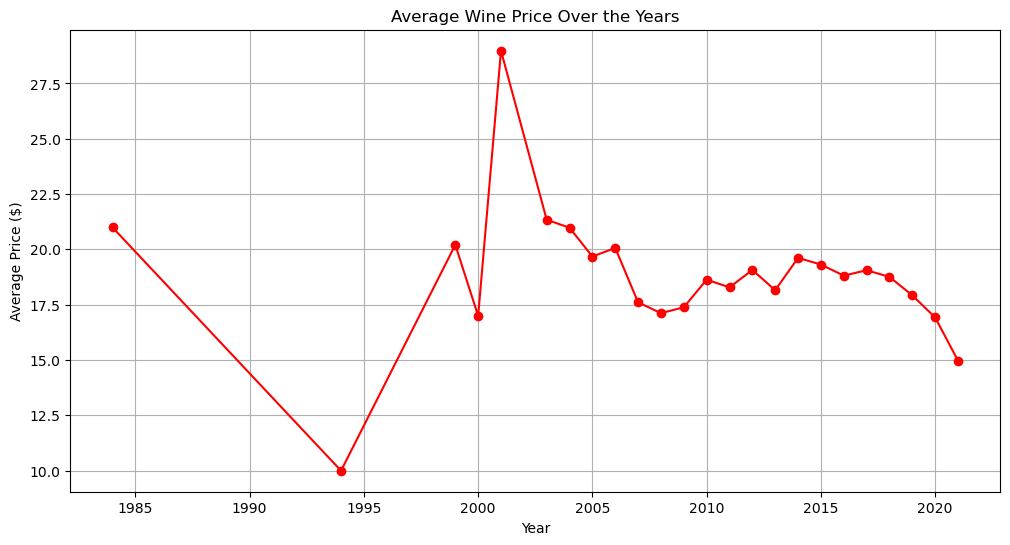

In [16]:
average_price_by_year = wine_df.groupby('wine_year')['wine_price'].mean()

# Create a line plot to visualize the price trends over the years
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o', linestyle='-', color='red')
plt.title('Average Wine Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

#### porpular wine producing countries

In [18]:
wine_df['wine_country'].value_counts()

United States      3088
Italy              1984
France             1773
Spain               983
Argentina           734
Chile               497
Australia           425
Portugal            265
South Africa        198
New Zealand          89
Greece               76
Israel               72
Austria              36
Germany              23
Uruguay              22
Mexico               20
Georgia              10
Croatia              10
Bulgaria              9
Hungary               8
Lebanon               8
Slovenia              8
Turkey                7
Canada                5
Armenia               5
North Macedonia       4
Bolivia               2
Montenegro            1
Slovakia              1
Moldova               1
India                 1
Morocco               1
Serbia                1
Romania               1
Czech Republic        1
Name: wine_country, dtype: int64

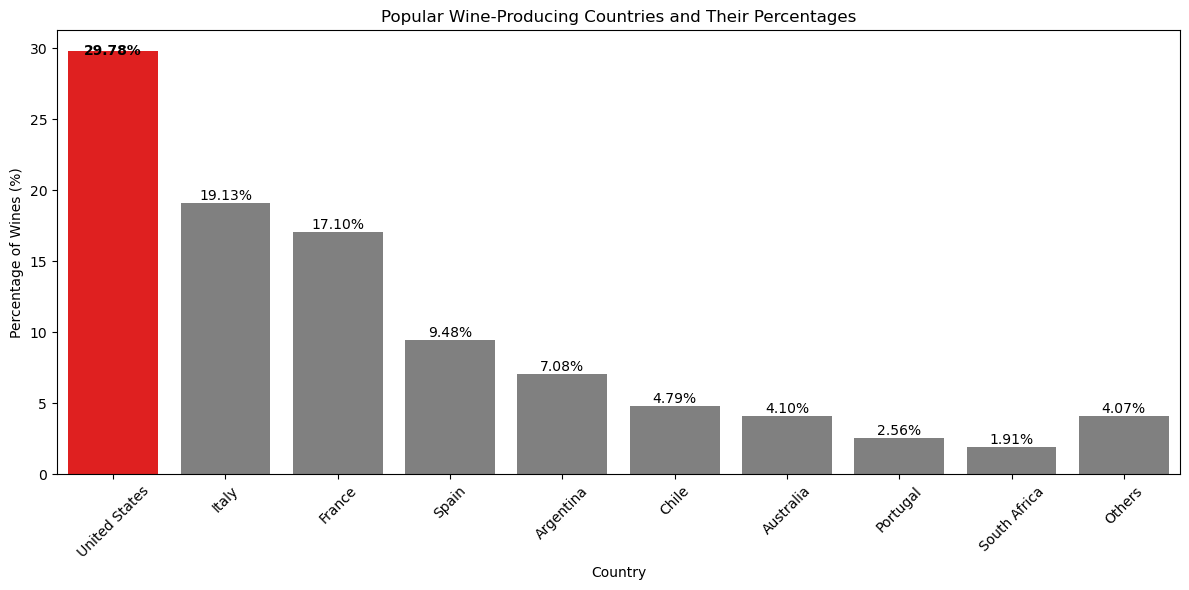

In [19]:
# Set a threshold for countries with less than 1% of wines
threshold = 1  # Adjust this threshold as needed
# Group the data by 'wine_country' and calculate the count of wines produced in each country
wine_count_by_country = wine_df['wine_country'].value_counts()

# Calculate the percentage of wines produced in each country
total_wines = len(wine_df)
percentage_by_country = (wine_count_by_country / total_wines) * 100

# Filter countries that meet the threshold
top_countries = percentage_by_country[percentage_by_country >= threshold]
other_countries = percentage_by_country[percentage_by_country < threshold]

# Combine less common countries into 'Others'
other_percentage = other_countries.sum()
top_countries['Others'] = other_percentage

# Create a list of colors based on the condition
clrs = ['red' if x == max(top_countries) else 'grey' for x in top_countries]

plt.figure(figsize=(12, 6))
barplot = sb.barplot(x=top_countries.index, y=top_countries, palette=clrs)
plt.xlabel('Country')
plt.ylabel('Percentage of Wines (%)')
plt.title('Popular Wine-Producing Countries and Their Percentages')
plt.xticks(rotation=45)  # Rotate the country names for better readability

# Annotate the most popular wine countries with percentages
for p in barplot.patches:
    if p.get_height() == max(top_countries):
        barplot.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', weight='bold')
    else:
        barplot.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### Top five wineries in the top 3 wine producing Countries  (united state, Italy and France) and their Regions

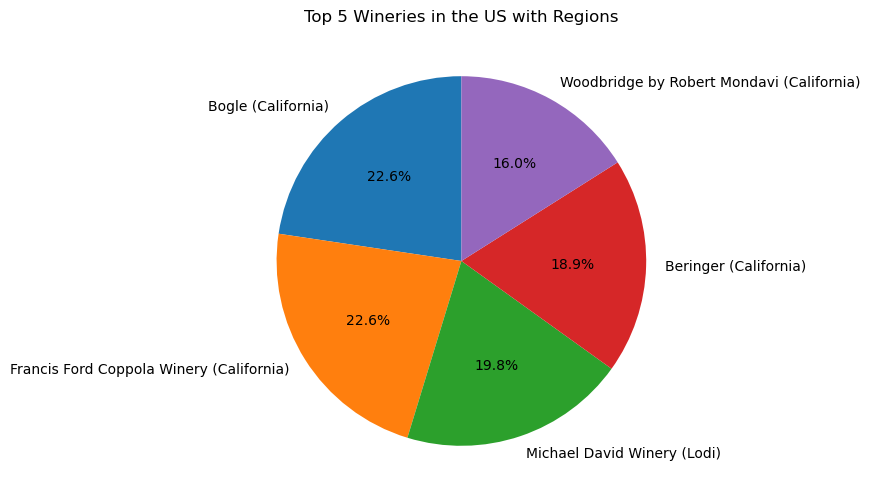

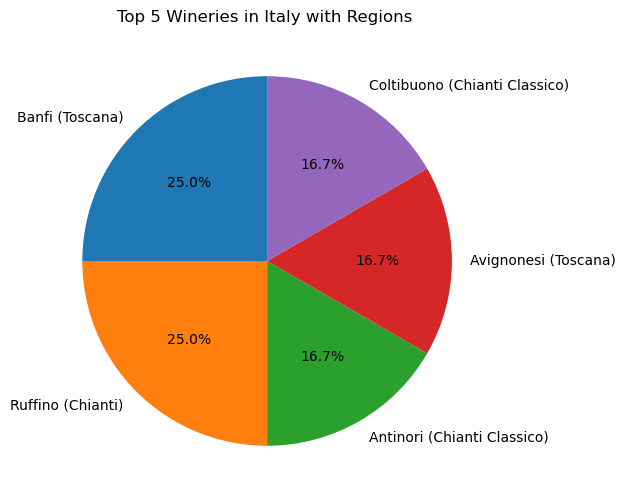

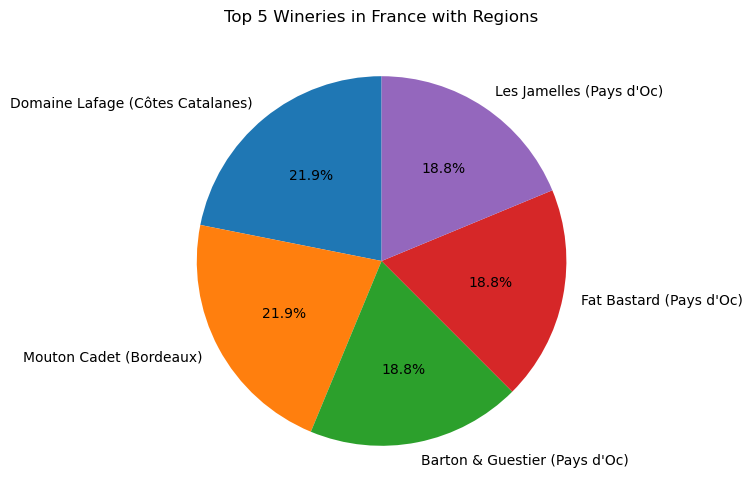

In [14]:
# Filter the data for each country
us_wines = wine_df[wine_df['wine_country'] == 'United States']
italy_wines = wine_df[wine_df['wine_country'] == 'Italy']
france_wines = wine_df[wine_df['wine_country'] == 'France']

# Function to create a pie chart for the top five wineries in a country
def create_pie_chart(country_wines, title):
    winery_counts = country_wines.groupby(['winery', 'wine_region']).size().nlargest(5)
    winery_labels = [f"{winery} ({region})" for (winery, region) in winery_counts.index]

    plt.figure(figsize=(6, 6))
    plt.pie(winery_counts, labels=winery_labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

# Create pie charts for each country
create_pie_chart(us_wines, 'Top 5 Wineries in the US with Regions')
create_pie_chart(italy_wines, 'Top 5 Wineries in Italy with Regions ')
create_pie_chart(france_wines, 'Top 5 Wineries in France with Regions')


#### Top most expensive wine

In [59]:
# filter the wine_price to the maximum price
top_most_exp_wine = wine_df.loc[wine_df['wine_price'] == wine_df['wine_price'].max()]
top_most_exp_wine

,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
13212,Rosso20,2020,Italy,Trentino,Furlani,3.9,25,30.0
13213,Sexual Chocolate Red,2018,United States,California,SLO Down,4.1,1049,30.0
13214,Saint-Joseph,2016,France,Saint-Joseph,Robert & Stephane Rousset,4.1,30,30.0
13217,Pinot Noir,2017,United States,California,Canvas,3.6,94,30.0
13220,LTL,2018,United States,Washington,Upchurch Vineyard,3.9,52,30.0
13226,Morgon Grand Cras,2016,France,Morgon,Domaine Mee Godard,3.8,96,30.0
13228,Perrières Bourgueil,2015,France,Bourgueil,Domaine de la Butte,3.8,68,30.0
13229,Collection Cuvée Tradition Châteauneuf-du-Pape,2018,France,Châteauneuf-du-Pape,Domaine de Cristia,3.9,378,30.0
13230,Les Tours Beaujolais Villages,2017,France,Beaujolais-Villages,Justin Dutraive,4.2,56,30.0
13233,Allusion,2012,United States,Santa Barbara County,Blackjack Ranch,3.5,41,30.0


#### countries that produce the most expensive wine on a average

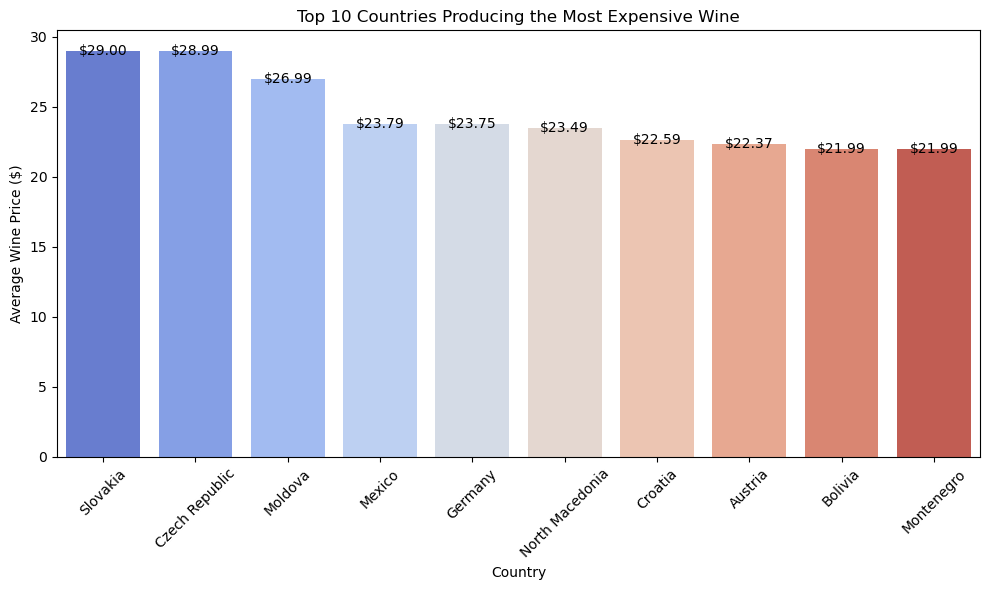

In [52]:
# Group the data by 'wine_country' and calculate the average wine price for each country
average_price_by_country = wine_df.groupby('wine_country')['wine_price'].mean()

# Sort the countries by average wine price in descending order and select the top N countries
top_n = 10  # Change this to display more or fewer countries
most_expensive_countries = average_price_by_country.sort_values(ascending=False).head(top_n)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=most_expensive_countries.index, y=most_expensive_countries, palette='coolwarm')
plt.xlabel('Country')
plt.ylabel('Average Wine Price ($)')
plt.title(f'Top {top_n} Countries Producing the Most Expensive Wine')
plt.xticks(rotation=45)  # Rotate the country names for better readability

# Annotate the bars with average wine prices
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


#### year with the highest number of production

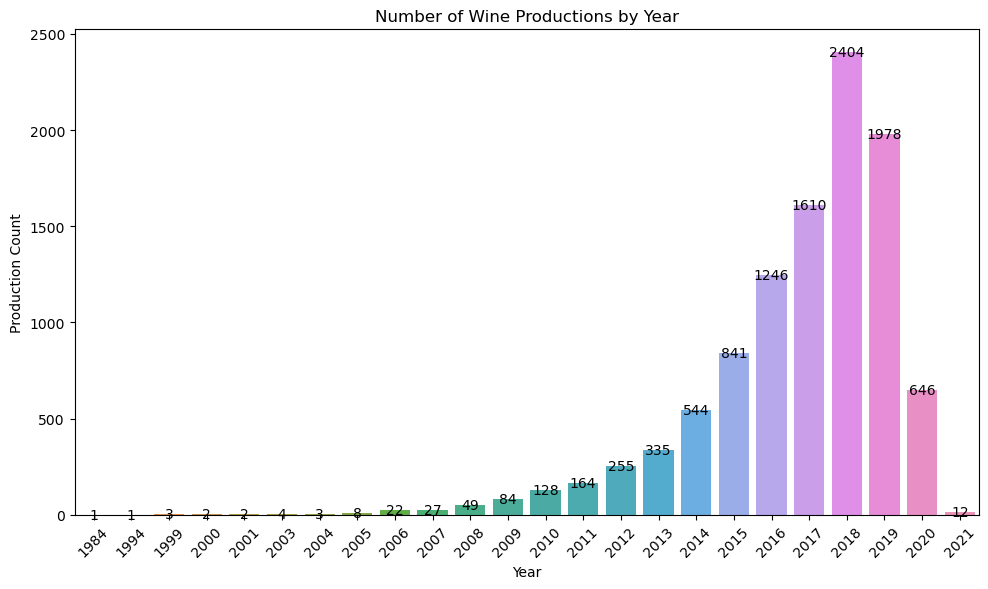

In [22]:
# Group the data by 'wine_year' and calculate the count of wines for each year
wine_production_by_year = wine_df['wine_year'].value_counts().reset_index()
wine_production_by_year.columns = ['Year', 'Production Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sb.barplot(x='Year', y='Production Count', data = wine_production_by_year)
plt.xlabel('Year')
plt.ylabel('Production Count')
plt.title('Number of Wine Productions by Year')
plt.xticks(rotation=45)  # Rotate the year labels for better readability

# Annotate the bars with production counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### Winery with the highest number of production 

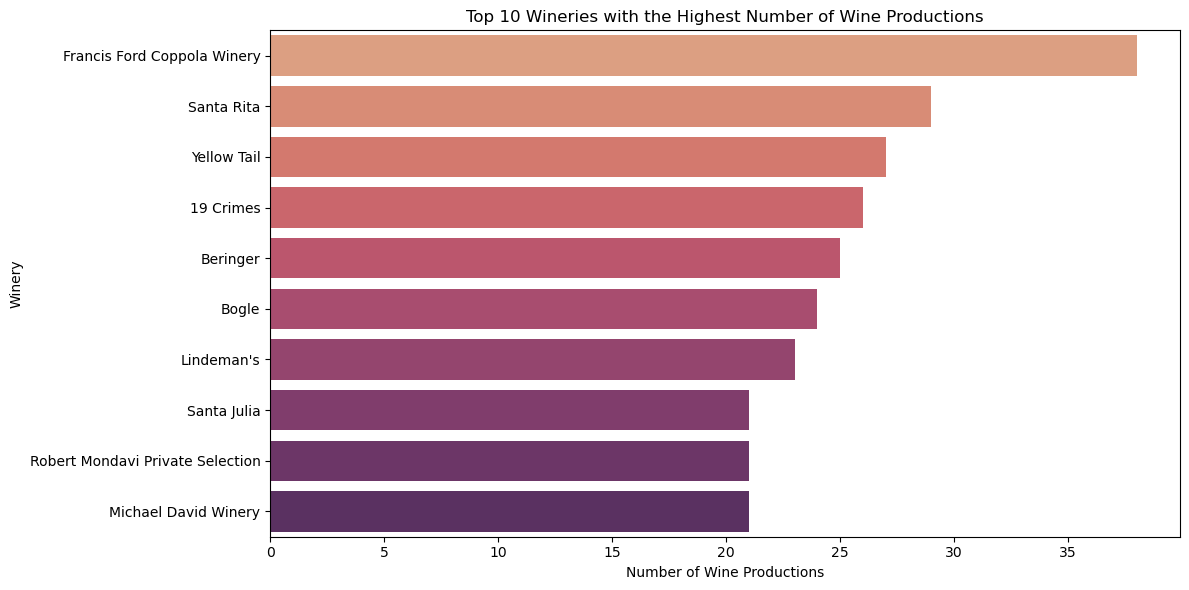

In [23]:
# Group the data by 'winery' and calculate the count of wines produced by each winery
winery_production = wine_df['winery'].value_counts()

# Find the top 10 wineries with the highest number of wine productions
top_10_winery_production = winery_production.head(10)
# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(12, 6))
sb.barplot(x=top_10_winery_production.values, y=top_10_winery_production.index, palette = 'flare')
plt.xlabel('Number of Wine Productions')
plt.ylabel('Winery')
plt.title('Top 10 Wineries with the Highest Number of Wine Productions')
plt.tight_layout()
plt.show()

#### Countries with the highest winery

In [24]:
# Group the data by 'wine_country' and count the number of unique wineries in each country
winery_counts_by_country = wine_df.groupby('wine_country')['winery'].nunique()

# Find the countries with the most wineries
countries_with_most_wineries = winery_counts_by_country.nlargest(20)

# Display the top 10 countries with the most wineries
print(countries_with_most_wineries)

wine_country
France           1120
United States    1110
Italy            1035
Spain             470
Argentina         209
Portugal          149
Australia         145
Chile             129
South Africa      109
New Zealand        56
Greece             49
Austria            30
Israel             21
Germany            17
Mexico             12
Croatia            10
Georgia             9
Uruguay             9
Slovenia            8
Hungary             7
Name: winery, dtype: int64


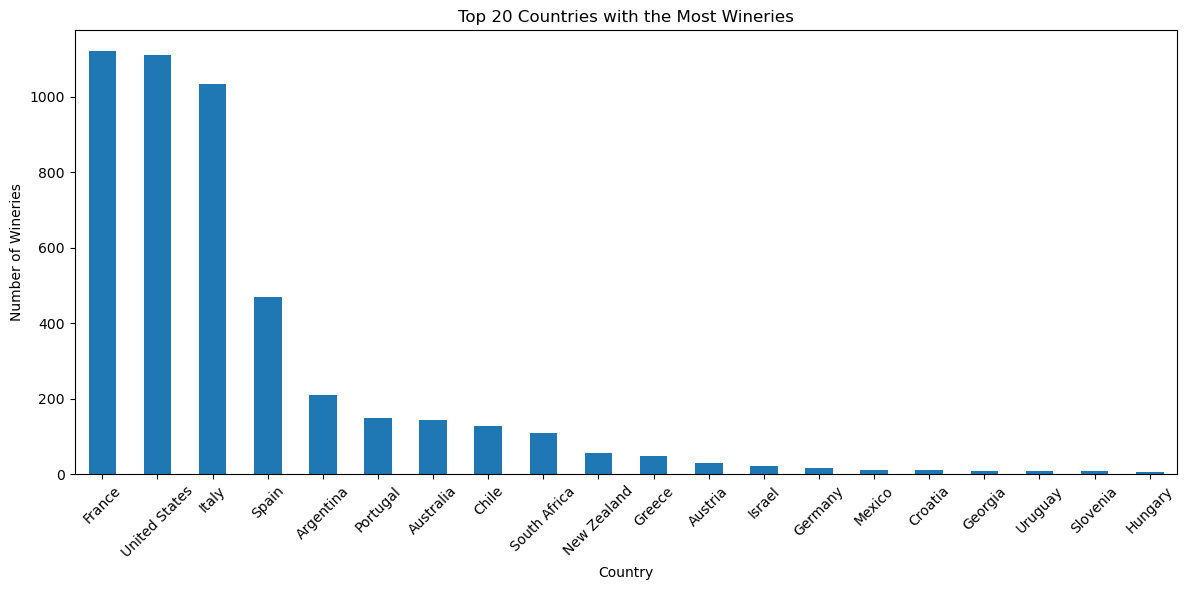

In [25]:
# Create a bar chart to visualize the top countries with the most wineries
plt.figure(figsize=(12, 6))
countries_with_most_wineries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Wineries')
plt.title('Top 20 Countries with the Most Wineries')
plt.xticks(rotation=45)  # Rotate the country names for better readability
plt.tight_layout()
plt.show()

#### Most expensive wine by each country

In [42]:
# Group the data by 'wine_country' and select the most expensive wine for each country
most_expensive_wines_by_country = wine_df.groupby('wine_country')['wine_price'].idxmax()
most_expensive_wines = wine_df.loc[most_expensive_wines_by_country]

# Display the most expensive wine produced by each country
most_expensive_wines

,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
13380,Malbec,2016,Argentina,Mendoza,Mariflor,4.1,914,30.00
13368,Reserve Areni,2017,Armenia,Aragatsotn,Van Ardi,4.1,70,29.33
13317,Regional Selection Cabernet Sauvignon,2015,Australia,Clare Valley,Kirrihill,3.8,38,30.00
13098,Blaufränkisch Leithaberg,2017,Austria,Neusiedlersee-Hügelland,Heinrich,3.7,406,29.99
6881,Syrah,2018,Bolivia,Tarija,La Concepción,4.0,42,21.99
12431,Reserve Elenovo Mavrud,2015,Bulgaria,Thracian Valley,Edoardo Miroglio,4.0,80,28.00
11895,Primesautier,2020,Canada,Niagara Peninsula,Pearl Morissette,4.1,31,26.99
13319,Unique Selection,2017,Chile,Colchagua Valley,Siegel,4.2,43,30.00
12070,Barbba,2020,Croatia,Dalmatian Coast,Vinas Mora,3.8,35,26.99
12787,Barvírka,2019,Czech Republic,Morava,Milan Nestarec,3.9,133,28.99


#### Countries with the highest number of wine production per year

In [61]:
# Group the data by 'wine_country' and 'wine_year' and calculate the production count for each group
production_by_country_year = wine_df.groupby(['wine_country', 'wine_year']).size().reset_index(name='production_count')

# Find the country with the highest production count for each year
max_production_per_year = production_by_country_year.loc[production_by_country_year.groupby('wine_year')['production_count'].idxmax()]

# Display the result
max_production_per_year

,wine_country,wine_year,production_count
216,Spain,1984,1
241,United States,1994,1
138,Italy,1999,1
139,Italy,2000,1
56,Chile,2001,1
81,France,2003,2
142,Italy,2004,2
82,France,2005,3
144,Italy,2006,8
145,Italy,2007,7


#### Regions withe the Highest wine producion in the United States

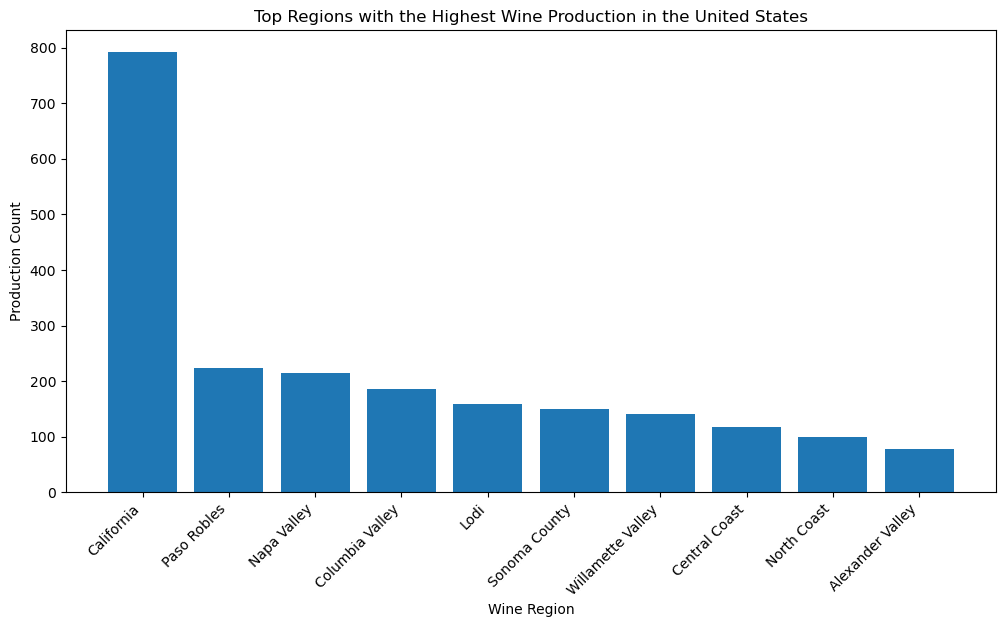

In [37]:
# Filter for wines from the United States
us_wines = wine_df[wine_df['wine_country'] == 'United States']

# Group the data by 'wine_region' and calculate the production count for each region
production_by_region = us_wines['wine_region'].value_counts().reset_index(name='production_count')

# Find the top regions with the highest production count
top_regions = production_by_region.nlargest(10, 'production_count')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_regions['index'], top_regions['production_count'])
plt.xlabel('Wine Region')
plt.ylabel('Production Count')
plt.title('Top Regions with the Highest Wine Production in the United States')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Wine Ratings By Each Country

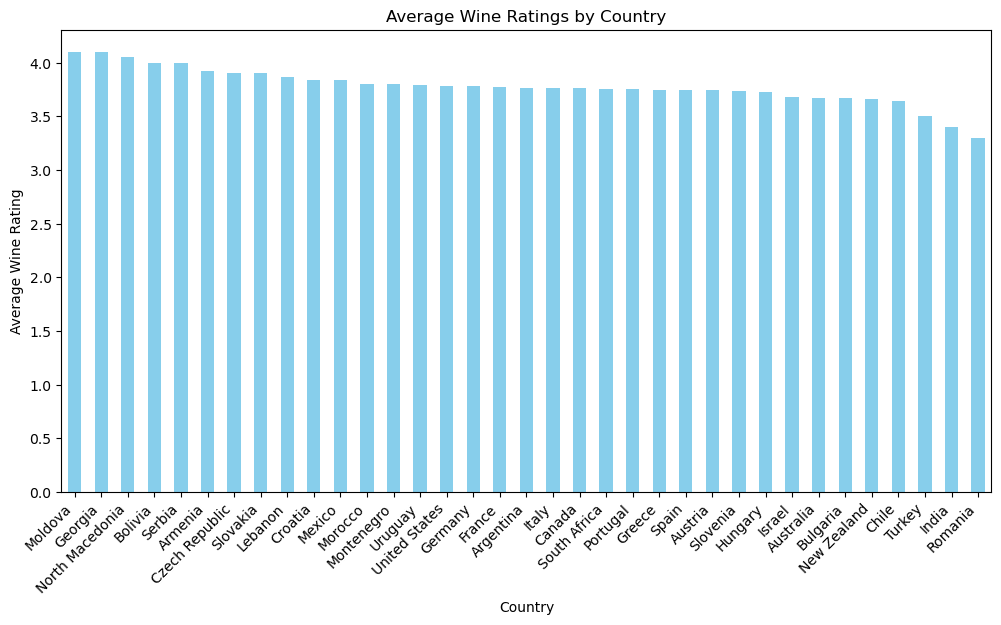

In [43]:
# Group the data by 'wine_country' and calculate the average rating for each country
average_rating_by_country = wine_df.groupby('wine_country')['wine_rating'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
average_rating_by_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Wine Rating')
plt.title('Average Wine Ratings by Country')
plt.xticks(rotation=45, ha='right')
plt.show()